- 统计学习的对象是数据
- 统计学习方法包括模型的假设空间、模型选择的准则以及模型学习的算法，称其为统计学习方法的三要素，简称为模型、策略和算法
- 实现统计学习方法的步骤：

    （1） 得到一个有限的训练数据集合；
    
    （2） 确定学习模型的集合；
    
    （3） 确定模型选择的准则，即学习的策略；
    
    （4） 实现求解最优模型的算法，即学习的算法；
    
    （5） 通过学习方法选择最优模型；
    
    （6） 利用学习的最优模型对新数据进行预测或分析


### 1.2  监督学习

**基本概念**

1. 输入空间、特征空间和输出空间
    
    有时假设输入空间与特征空间为相同的空间，有时假设不同，将实例从输入空间映射到特征空间。模型实际上都是定义在特征空间上的

    输入变量X与输出变量Y： 均为连续变量的问题称为回归问题；输出变量为有限个离散变量的预测问题称为分类问题；输入变量与输出变量均为变量序列的问题称为标注问题
    
### 1.3 三要素

**1. 模型**

模型就是所要学习的条件概率分布或决策函数

**2.策略**

即如何在假设空间中找到最优模型：使用损失函数或风险函数。损失函数度量模型一次预测的好坏，风险函数度量平均意义下模型预测的好坏

常用的损失函数有：（1）0-1损失函数；（2）平方损失函数；（3）绝对损失函数；（4）对数损失函数或对数似然函数

风险函数是损失函数的期望。

- 经验风险最小化与结构风险最小化:经验风险最小化就是是风险函数最小，当样本容量很小时，可能会产生过拟合现象。
- 结构风险最小化可以防止过拟合，它等价于正则化，结构风险在经验风险上加上了表示模型复杂度的正则化项。

**3. 算法**

选择了最优模型后，考虑用什么样的计算方法求解最优模型。


### 1.4 模型评估与模型选择
1. 训练误差与测试误差
2. 过拟合与模型选择
    
    若只考虑减少误差就可能产生过拟合，模型选择的方法有正则化与交叉验证

目标函数$y=sin2{\pi}x$, 加上一个正态分布的噪音干扰，用多项式去拟合

In [1]:
# 过拟合与模型选择


import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt

# 目标函数
def real(x):
    return np.sin(2*np.pi*x)

#多项式
def fit(p,x):
    f = np.poly1d(p)   # p是列表，长度代表最高次幂-1  元素是每一项的系数
    return f(x)
# 差
def res(p,x,y):
    ret = fit(p,x)-y
    return ret




In [4]:
# 在目标函数上找10个点进行拟合

x = np.linspace(0,1,10)    # 0-1 范围内均匀取10个点
x_points = np.linspace(0,1,1000)

y_ = real(x)   # 对应的y点

y = [np.random.normal(0,0.1) +y1 for y1 in y_]  # 加上正态分布的噪声,得到的点不完全与real重合，对这些点进行拟合

def fitting(M=0):
    p_init = np.random.rand(M+1) #随机初始化多项式参数，M为多项式的次数（实际是P-1次，这里加上1）
    p_lsq = leastsq(res,p_init,args=(x,y))  # 最小二乘法求最小值
    
    print('Fitting Parameters',p_lsq[0])
    
    plt.plot(x_points, real(x_points), label='real')          # 目标函数
    plt.plot(x_points, fit(p_lsq[0], x_points), label='fitted curve')  # 拟合函数
    plt.plot(x, y, '*', label='noise')                        # 点
    
    plt.legend()
    return p_lsq

Fitting Parameters [0.05411206]


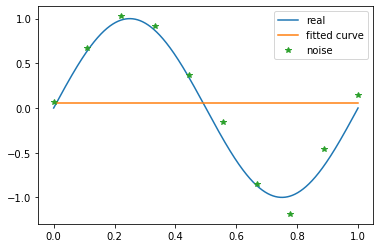

In [5]:
# M=0
p_lsq_0 = fitting(M=0)

Fitting Parameters [-1.30815175  0.70818793]


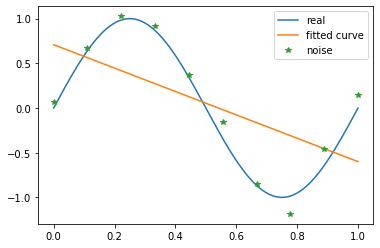

In [6]:
# M=1
p_lsq_1 = fitting(M=1)

Fitting Parameters [ 2.23181266e+01 -3.32191380e+01  1.11358412e+01 -2.50729390e-02]


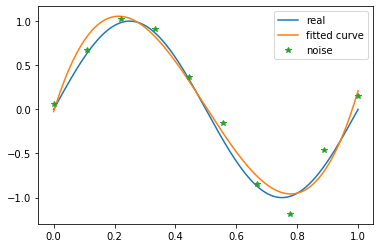

In [7]:

# M=3
p_lsq_3 = fitting(M=3)

Fitting Parameters [ 1.36029161e+04 -6.29877685e+04  1.21867442e+05 -1.27791504e+05
  7.87394459e+04 -2.88368302e+04  6.03362487e+03 -6.61152720e+02
  3.39118268e+01  6.48549952e-02]


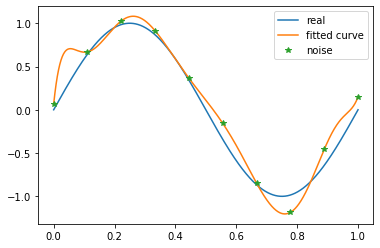

In [8]:
# M=9
p_lsq_9 = fitting(M=9)

- 监督学习的任务就是学习一个模型，监督学习方法又可以分为生成方法和判别方法，学习到的模型分别称为生成模型和判别模型。
    - 生成方法学习的模型表示了给定输入X产生输出Y的生成关系，典型的生成模型有：朴素贝叶斯法和隐马尔可夫模型。
    - 判别方法关心的是对给定的输入X，应该预测什么样的输出Y，典型的判别模型包括k近邻法、感知机、决策树、逻辑斯谛回归模型、最大熵模型、支持向量机、提升方法和条件随机场等
    
总结：生成方法学习的是输入输出的关系，收敛速度更快。判别关系注重决策函数，直接面对预测，学习的准确率更高